In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
from google.colab import files
uploaded = files.upload()

Saving retail_sales_dataset.csv to retail_sales_dataset (1).csv


In [10]:
df=pd.read_csv('retail_sales_dataset.csv')

In [12]:
df.head()



,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [13]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [14]:
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [19]:
df.columns


Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [25]:

df['Date'] = pd.to_datetime(df['Date'])


In [26]:

total_sales = df['Total Amount'].sum()
revenue_by_category = df.groupby('Product Category')['Total Amount'].sum()
average_order_value = df['Total Amount'].mean()

print("Total Sales:", total_sales)
print("Revenue by Category:\n", revenue_by_category)
print("Average Order Value:", average_order_value)

Total Sales: 456000
Revenue by Category:
 Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64
Average Order Value: 456.0


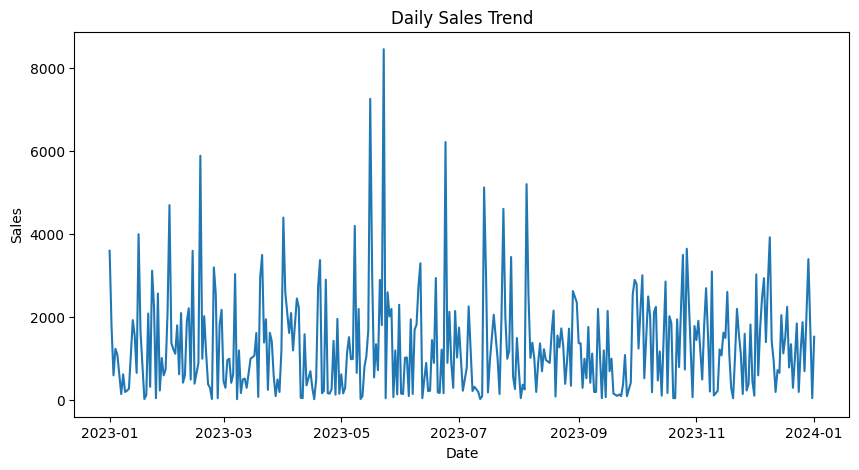

In [27]:
# Sales trend over time
sales_trend = df.groupby('Date')['Total Amount'].sum()
plt.figure(figsize=(10,5))
plt.plot(sales_trend.index, sales_trend.values)
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


/tmp/ipython-input-3542650468.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, palette="viridis")


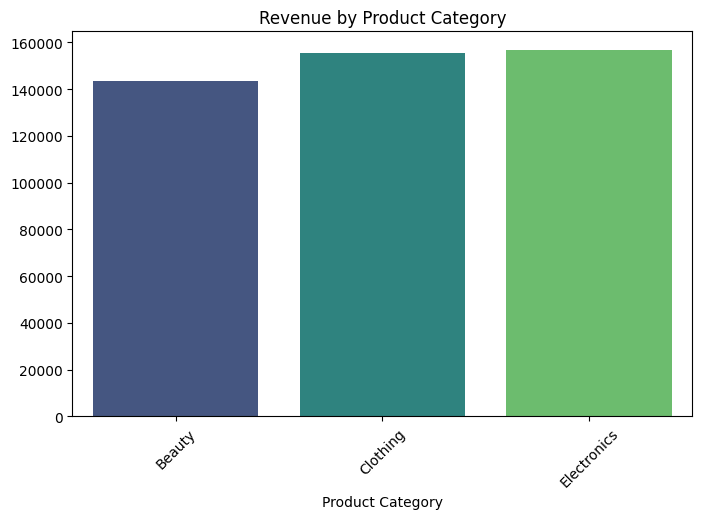

In [28]:

# Sales by Product Category
plt.figure(figsize=(8,5))
sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, palette="viridis")
plt.title("Revenue by Product Category")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-1276344356.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Total Amount', data=df, estimator=sum, palette="coolwarm")


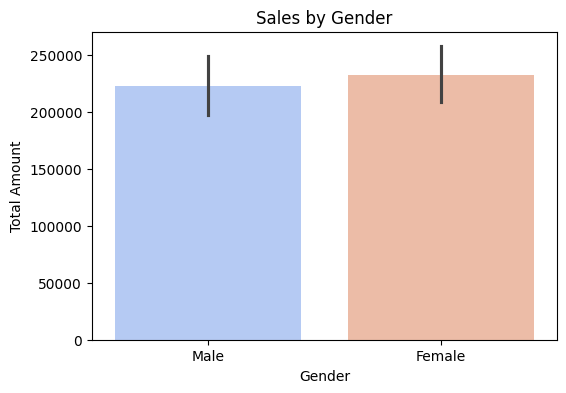

In [29]:

# Gender vs Total Sales
plt.figure(figsize=(6,4))
sns.barplot(x='Gender', y='Total Amount', data=df, estimator=sum, palette="coolwarm")
plt.title("Sales by Gender")
plt.show()


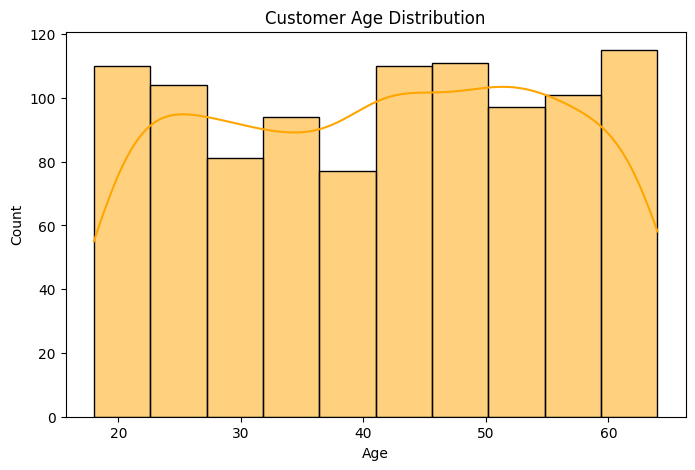

In [30]:

# Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=10, kde=True, color="orange")
plt.title("Customer Age Distribution")
plt.show()
